# New York City Taxi Fare Prediction

The task is to predict the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations.  While I can get a basic estimate based on just the distance between the two points, this will result in an RMSE of $5-$8, depending on the model used. The challenge is to do better than this using Machine Learning techniques!

All datasets and the task itself were taken from the Kaggle playground competition, I do not own any of them.

## Taxi fare prediction analysis - cleaning up the training data


First we need to look at the data:

In [2]:
# load some default Python modules that will be used for all the sections of the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-whitegrid')



In [4]:
# read training data with limiting to the rows, as the file is big

tax_train = pd.read_csv("train.csv", nrows = 10_000, parse_dates=["pickup_datetime"])

#and checking what columns the dataframe has
tax_train.columns.to_list()

['key',
 'fare_amount',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [5]:
# i can also check how the table would look like and get the shape of the dataframe
print(tax_train.shape)
tax_train.head()

(10000, 8)


,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1


I check the type of the data, I will need it later to pick up features for training.

In [6]:
# check datatypes
tax_train.dtypes

key                               object
fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

I check how the data looks like

In [7]:
tax_train.describe()


,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,11.235464,-72.466660,39.920448,-72.474094,39.893281,1.644700
std,9.584258,10.609729,7.318932,10.579732,6.339919,1.271229
min,-2.900000,-74.438233,-74.006893,-74.429332,-73.994392,0.000000
25%,6.000000,-73.992058,40.734547,-73.991112,40.735230,1.000000
50%,8.500000,-73.981758,40.752693,-73.980083,40.753738,1.000000
75%,12.500000,-73.966925,40.767694,-73.963504,40.768186,2.000000
max,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


I double check if there are any missing values (looks like there is none).

In [8]:
# get the number of missing data points per column
missing_values_count = tax_train.isnull().sum()

# look at the # of missing points
print(missing_values_count)

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64


In [ ]:
From the data description it looks that some `fare_amount` values are negative. As it cannot be so, I drop the negative values.

In [12]:
# Checking how many columns have negative values and if it will affect the results
tax_train[tax_train['fare_amount'] < 0]

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
2039,37:10.0,-2.9,2010-03-09 23:37:10+00:00,-73.789450,40.643498,-73.788665,40.641952,1
2486,14:27.0,-2.5,2015-03-22 05:14:27+00:00,-74.000031,40.720631,-73.999809,40.720539,1


Then I take a look into the test set to see how the columns look like there

In [9]:
# Read test data

tax_test = pd.read_csv("test.csv", nrows = 2_000)

#and checking what columns the data table has
tax_test.columns.to_list()

['key',
 'pickup_datetime',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count']

In [10]:
tax_train.isnull().any()

key                  False
fare_amount          False
pickup_datetime      False
pickup_longitude     False
pickup_latitude      False
dropoff_longitude    False
dropoff_latitude     False
passenger_count      False
dtype: bool

As I can see there is no `fare_amount` column, as I need to predict that column. The rest of the columns are in place.

After looking at the data, I need to determine a problem. I need to determine a model, to understand what kind of Machine Learning model to use.

I start with creating a histogramm of the data:

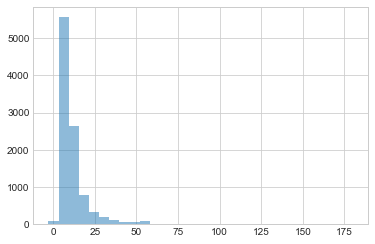

In [11]:
# Plot a histogram
tax_train.fare_amount.hist(bins=30, alpha=0.5)
plt.show()

From histogram I can see, that the `fare_amount` is a contionous variable, therefore I am dealing with the regression problem.

In [16]:
from sklearn.linear_model import LinearRegression


# Creating a LinearRegression object
lr = LinearRegression() 


I take some features in the train set and build a linear regression

In [15]:
# Fit the model on the train data

lr.fit(X=tax_train[['pickup_longitude',  'pickup_latitude',  'dropoff_longitude',  'dropoff_latitude',  'passenger_count']],
        y=tax_train['fare_amount'])

LinearRegression()